In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 30.8 MB/s eta 0:00:00


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import glob
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score , KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ruta del archivo
ruta = "/content/drive/MyDrive/Datos_anonimizados_sin_llave.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(ruta, sep=',')

In [ ]:
print(df.shape)

(43154, 73)


In [ ]:
df.head(10)

,AntencionPaciente llave,vGenero,EdadEgreso,Año_Salida,MES,Tipo_Afiliacion,Aseguradora,Modalidad_Contrato,Aseguradora2,Hospitalizacion,...,DiasEstanciaClinica,DiasEstanciaClinica_exacto,MODALIDAD,SERVICIO_ADMITE,ID_Medico_registra,NombreTipoDiagnostico,Tipo_egreso,Transfusiones,Antioboticos,UCI_UCE
0,1,0,62,2022,Abril,2,69,1,43,3,...,1,1.048533,2,4,155,1,0,NO,NO,NO
1,2,1,89,2022,Marzo,2,48,2,32,7,...,4,3.943370,4,7,561,0,0,NO,NO,NO
2,3,1,90,2023,Septiembre,2,48,2,43,3,...,2,1.794684,4,8,5,0,2,NO,SI,NO
3,4,1,88,2022,Enero,2,69,1,43,3,...,3,2.564836,4,8,1,0,0,NO,SI,NO
4,5,0,89,2023,Agosto,3,69,1,43,3,...,5,5.486410,4,8,167,0,0,NO,NO,NO
5,6,1,74,2022,Diciembre,2,48,1,43,3,...,10,10.021090,2,4,202,1,0,NO,NO,NO
6,7,0,87,2022,Abril,2,69,1,43,3,...,2,1.975901,4,7,144,0,0,NO,SI,NO
7,8,0,87,2022,Mayo,2,69,1,43,3,...,6,5.912695,4,8,504,0,0,NO,SI,NO
8,9,0,87,2022,Noviembre,2,69,1,43,3,...,9,9.057282,4,8,328,0,0,NO,SI,NO
9,10,0,87,2022,Noviembre,2,69,1,43,3,...,6,5.440222,4,8,137,0,0,NO,SI,NO


In [ ]:
df.describe()

,AntencionPaciente llave,vGenero,EdadEgreso,Año_Salida,Tipo_Afiliacion,Aseguradora,Modalidad_Contrato,Aseguradora2,Hospitalizacion,Ciclo_Vital,ESPECIALIDAD_GRD,HorasdeAlta,DiasEstanciaServicio,DiasEstanciaClinica,DiasEstanciaClinica_exacto,MODALIDAD,SERVICIO_ADMITE,ID_Medico_registra,NombreTipoDiagnostico,Tipo_egreso
count,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000
mean,21577.500000,0.504588,58.381842,2022.435139,2.274783,35.070515,1.147750,39.858321,3.673055,3.598508,22.394749,49.703272,5.680122,8.822450,10.932238,3.045117,6.387195,253.390485,0.515850,0.317282
std,12457.631095,0.499985,23.777474,0.495781,0.727988,21.396183,0.355443,8.375940,1.534199,1.815371,12.051622,78.537934,6.523779,10.894775,305.985176,1.267915,2.109714,172.756510,0.500033,0.911028
min,1.000000,0.000000,0.000000,2022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8376.000000,0.000000,0.000000,0.007969,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10789.250000,0.000000,42.000000,2022.000000,2.000000,3.000000,1.000000,43.000000,3.000000,1.000000,10.000000,24.000000,2.000000,3.000000,2.716282,2.000000,4.000000,105.000000,0.000000,0.000000
50%,21577.500000,1.000000,64.000000,2022.000000,2.000000,48.000000,1.000000,43.000000,3.000000,5.000000,23.000000,48.000000,4.000000,5.000000,5.532172,4.000000,8.000000,230.000000,1.000000,0.000000
75%,32365.750000,1.000000,77.000000,2023.000000,3.000000,48.000000,1.000000,43.000000,3.000000,5.000000,34.000000,72.000000,7.000000,11.000000,10.654665,4.000000,8.000000,393.000000,1.000000,0.000000
max,43154.000000,1.000000,111.000000,2023.000000,3.000000,73.000000,3.000000,44.000000,9.000000,5.000000,42.000000,11448.000000,122.000000,207.000000,45068.558090,4.000000,10.000000,590.000000,2.000000,5.000000


In [ ]:
# Calculando valores faltantes en las columnas:
k = df.isna().sum()
k[k!=0]

Tipo_Internacion                     209
D_Capitulo_CIE10                     141
RangoCapitulo                        141
ClasificacionCronico_DX_Principal    112
ClasificacionCronico_DX_Medico        92
ClasificacionCronico_DX_R1           131
ClasificacionCronico_DX_R2            90
ClasificacionCronico_DX_R3            67
ClasificacionCronico_DX_F3            57
ClasificacionCronico_DX_F3_R1          7
ClasificacionCronico_DX_F3_R2          1
ClasificacionCronico_DX_F3_R3          2
ClasificacionCronico_DX_pre_cx        31
ClasificacionCronico_DX_pos_cx        28
Subcapitulo_DX_Muerte                 10
capitulo_DX_Muerte                    10
ClasificacionCronico_DX_MUERTE        11
dtype: int64

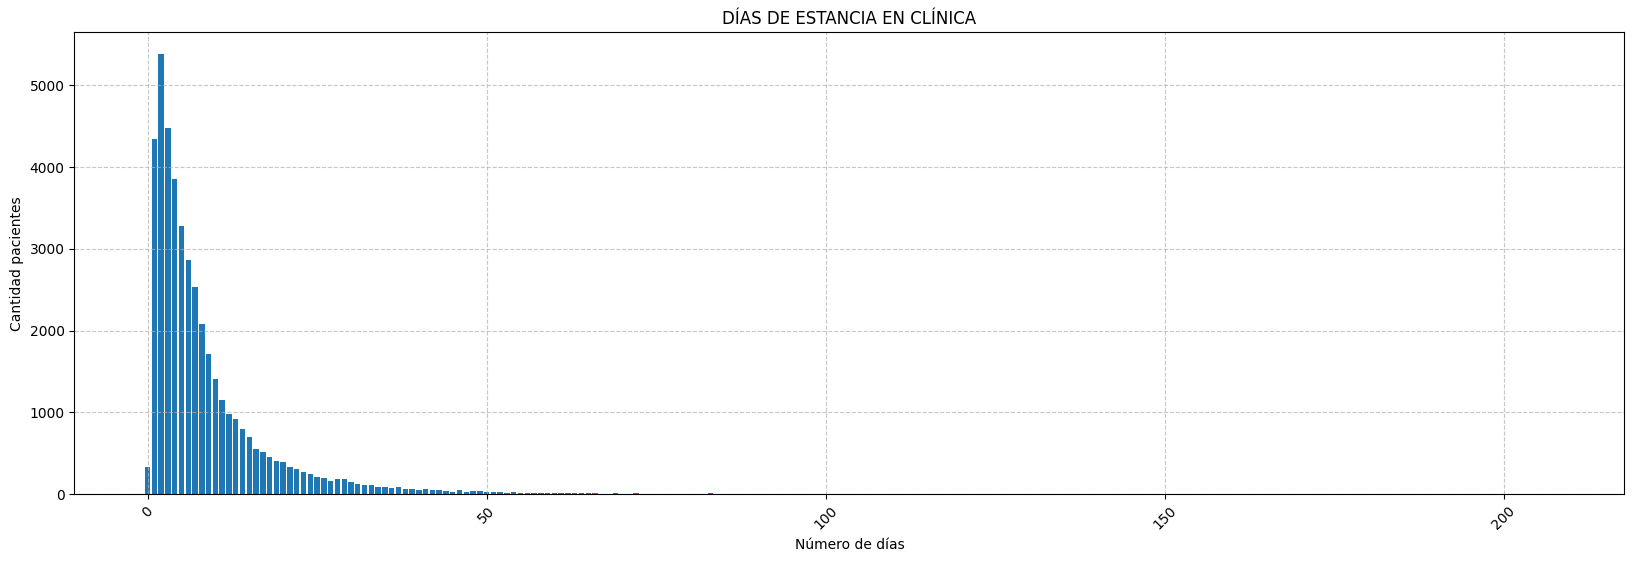

In [ ]:
#Graficando los días de estancia en la Clínica:
estClin_counts = df['DiasEstanciaClinica'].value_counts()
estClin = estClin_counts.index
frecuencia = estClin_counts.values

plt.figure(figsize=(20, 6))
plt.bar(estClin, frecuencia)
plt.title('DÍAS DE ESTANCIA EN CLÍNICA')
plt.xlabel('Número de días')
plt.ylabel('Cantidad pacientes')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['vGenero'].value_counts()

1    21775
0    21379
Name: vGenero, dtype: int64

In [ ]:
df['DiasEstanciaClinica'].value_counts()

2      5380
3      4473
1      4340
4      3857
5      3285
       ... 
160       1
138       1
171       1
168       1
108       1
Name: DiasEstanciaClinica, Length: 134, dtype: int64

In [ ]:
max_dia = df['DiasEstanciaClinica'].max()
max_frec_dia = df['DiasEstanciaClinica'].value_counts().max()
print(max_dia)
print(max_frec_dia)

207
5380


In [ ]:
#Visualizando a qué categroía pertenecen las variables del dataset
columnas_numericas = df.select_dtypes(include=['number'])
columnas_categoricas = df.select_dtypes(include=['object'])

print("Columnas Numéricas:")
print(columnas_numericas.columns.tolist())

print("\nColumnas Categóricas:")
print(columnas_categoricas.columns.tolist())

Columnas Numéricas:
['AntencionPaciente llave', 'vGenero', 'EdadEgreso', 'Año_Salida', 'Tipo_Afiliacion', 'Aseguradora', 'Modalidad_Contrato', 'Aseguradora2', 'Hospitalizacion', 'Ciclo_Vital', 'ESPECIALIDAD_GRD', 'HorasdeAlta', 'DiasEstanciaServicio', 'DiasEstanciaClinica', 'DiasEstanciaClinica_exacto', 'MODALIDAD', 'SERVICIO_ADMITE', 'ID_Medico_registra', 'NombreTipoDiagnostico', 'Tipo_egreso']

Columnas Categóricas:
['MES', 'bloque', 'piso', 'Tipo_Internacion', 'DX_PRINCIPAL', 'D_DX_PPAL', 'D_Capitulo_CIE10', 'RangoCapitulo', 'Categoria', 'D_subcapitulo_CIE10', 'DescSubgrupoOncologia', 'SubgrupoOncologia', 'ClasificacionCronico_DX_Principal', 'DX_MEDICO', 'D_DX_MEDICO', 'ClasificacionCronico_DX_Medico', 'DX_R1', 'D_DX_R1', 'ClasificacionCronico_DX_R1', 'DX_R2', 'D_DX_R2', 'ClasificacionCronico_DX_R2', 'DX_R3', 'D_DX_R3', 'ClasificacionCronico_DX_R3', 'DX_F3', 'D_DX_F3', 'ClasificacionCronico_DX_F3', 'DX_F3_R1', 'D_DX_F3_R1', 'ClasificacionCronico_DX_F3_R1', 'DX_F3_R2', 'D_DX_F3_R2', 

In [ ]:
#Cuántas categorías tienen las variables categóricas:
column_num = df.select_dtypes(include=['number'])
column_categ = df.select_dtypes(include=['object'])

for columna in column_categ.columns:
    cardinalidad = len(df[columna].unique())
    print(f"Variable '{columna}' tiene {cardinalidad} categorías únicas.")

Variable 'MES' tiene 12 categorías únicas.
Variable 'bloque' tiene 3 categorías únicas.
Variable 'piso' tiene 12 categorías únicas.
Variable 'Tipo_Internacion' tiene 8 categorías únicas.
Variable 'DX_PRINCIPAL' tiene 2850 categorías únicas.
Variable 'D_DX_PPAL' tiene 22 categorías únicas.
Variable 'D_Capitulo_CIE10' tiene 22 categorías únicas.
Variable 'RangoCapitulo' tiene 958 categorías únicas.
Variable 'Categoria' tiene 958 categorías únicas.
Variable 'D_subcapitulo_CIE10' tiene 19 categorías únicas.
Variable 'DescSubgrupoOncologia' tiene 19 categorías únicas.
Variable 'SubgrupoOncologia' tiene 2849 categorías únicas.
Variable 'ClasificacionCronico_DX_Principal' tiene 58 categorías únicas.
Variable 'DX_MEDICO' tiene 3129 categorías únicas.
Variable 'D_DX_MEDICO' tiene 3127 categorías únicas.
Variable 'ClasificacionCronico_DX_Medico' tiene 62 categorías únicas.
Variable 'DX_R1' tiene 2836 categorías únicas.
Variable 'D_DX_R1' tiene 2820 categorías únicas.
Variable 'ClasificacionCroni

In [ ]:
#Cuántas categorías tienen las variables numéricas:
column_num = df.select_dtypes(include=['number'])
column_categ = df.select_dtypes(include=['object'])

for columna in column_num.columns:
    cardinalidad = len(df[columna].unique())
    print(f"Variable '{columna}' tiene {cardinalidad} categorías únicas.")

Variable 'AntencionPaciente llave' tiene 43154 categorías únicas.
Variable 'vGenero' tiene 2 categorías únicas.
Variable 'EdadEgreso' tiene 109 categorías únicas.
Variable 'Año_Salida' tiene 2 categorías únicas.
Variable 'Tipo_Afiliacion' tiene 4 categorías únicas.
Variable 'Aseguradora' tiene 74 categorías únicas.
Variable 'Modalidad_Contrato' tiene 4 categorías únicas.
Variable 'Aseguradora2' tiene 45 categorías únicas.
Variable 'Hospitalizacion' tiene 10 categorías únicas.
Variable 'Ciclo_Vital' tiene 6 categorías únicas.
Variable 'ESPECIALIDAD_GRD' tiene 43 categorías únicas.
Variable 'HorasdeAlta' tiene 41 categorías únicas.
Variable 'DiasEstanciaServicio' tiene 84 categorías únicas.
Variable 'DiasEstanciaClinica' tiene 134 categorías únicas.
Variable 'DiasEstanciaClinica_exacto' tiene 43125 categorías únicas.
Variable 'MODALIDAD' tiene 5 categorías únicas.
Variable 'SERVICIO_ADMITE' tiene 11 categorías únicas.
Variable 'ID_Medico_registra' tiene 591 categorías únicas.
Variable 'N

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43154 entries, 0 to 43153
Data columns (total 73 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   AntencionPaciente llave            43154 non-null  int64  
 1   vGenero                            43154 non-null  int64  
 2   EdadEgreso                         43154 non-null  int64  
 3   Año_Salida                         43154 non-null  int64  
 4   MES                                43154 non-null  object 
 5   Tipo_Afiliacion                    43154 non-null  int64  
 6   Aseguradora                        43154 non-null  int64  
 7   Modalidad_Contrato                 43154 non-null  int64  
 8   Aseguradora2                       43154 non-null  int64  
 9   Hospitalizacion                    43154 non-null  int64  
 10  bloque                             43154 non-null  object 
 11  piso                               43154 non-null  obj

VARIVABLES CATEGÓRICAS A BINARIZAR:

-Transfusiones.

-Antioboticos.

-UCI_UCE.

VARIABLES NUMÉRICAS A BINARIZAR:

-vGenero

In [4]:
#Eliminando las variables de poco interés:
df1=df.drop(['AntencionPaciente llave', 'Año_Salida', 'MES', 'Aseguradora', 'Aseguradora2',
                       'Modalidad_Contrato', 'DX_F3_R3', 'DX_F3_R3', 'bloque', 'piso', 'RangoCapitulo',
                       'Categoria', 'D_subcapitulo_CIE10', 'DescSubgrupoOncologia', 'SubgrupoOncologia',
                       'DX_MEDICO', 'D_DX_MEDICO', 'D_Subcapitulo_DX_Muerte', 'Subcapitulo_DX_Muerte',
                       'ClasificacionCronico_DX_F3_R2', 'capitulo_DX_Muerte', 'D_capitulo_DX_Muerte',
                       'ClasificacionCronico_DX_F3_R1', 'ClasificacionCronico_DX_MUERTE', 'DX_R1', 'D_DX_R2',
                       'D_DX_R3', 'DX_F3_R3', 'D_DX_F3_R2', 'DiasEstanciaClinica_exacto', 'D_DX_F3', 'DX_F3_R1',
                       'D_DX_F3_R1', 'SERVICIO_ADMITE', 'ID_Medico_registra', 'NombreTipoDiagnostico',
                       'D_DX_pre_cx', 'DX_pre_cx', 'vGenero', 'Tipo_egreso', 'D_DX_PPAL',
                       'D_Capitulo_CIE10', 'ClasificacionCronico_DX_Principal', 'ClasificacionCronico_DX_Medico',
                       'D_DX_R1', 'ClasificacionCronico_DX_R1', 'DX_R2', 'ClasificacionCronico_DX_R2',
                       'DX_R3', 'ClasificacionCronico_DX_R3', 'DX_F3', 'ClasificacionCronico_DX_F3',
                       'DX_F3_R2', 'D_DX_F3_R3', 'ClasificacionCronico_DX_F3_R3', 'ClasificacionCronico_DX_pre_cx',
                       'DX_pos_cx', 'D_DX_pos_cx', 'ClasificacionCronico_DX_pos_cx', 'DX_MUERTE', 'D_DX_MUERTE'],axis=1)

In [ ]:
print(df1.shape)

(43154, 14)


In [5]:
df1['Transfusiones']=df1['Transfusiones'].apply(lambda x: 1 if x=='SI' else 0)
df1['Transfusiones'].head(20)
df1['Transfusiones'].value_counts()

0    38520
1     4634
Name: Transfusiones, dtype: int64

In [6]:
df1['Antioboticos']=df1['Antioboticos'].apply(lambda x: 1 if x=='SI' else 0)
df1['Antioboticos'].head(20)
df1['Antioboticos'].value_counts()

0    23656
1    19498
Name: Antioboticos, dtype: int64

In [7]:
df1['UCI_UCE']=df1['UCI_UCE'].apply(lambda x: 1 if x=='SI' else 0)
df1['UCI_UCE'].head(20)
df1['UCI_UCE'].value_counts()

0    35864
1     7290
Name: UCI_UCE, dtype: int64

In [8]:
df1.head(5)

,EdadEgreso,Tipo_Afiliacion,Hospitalizacion,Tipo_Internacion,Ciclo_Vital,ESPECIALIDAD_GRD,DX_PRINCIPAL,HorasdeAlta,DiasEstanciaServicio,DiasEstanciaClinica,MODALIDAD,Transfusiones,Antioboticos,UCI_UCE
0,62,2,3,General adultos,5,30,H811,48,1,1,2,0,0,0
1,89,2,7,Urgencias >= 24 horas,5,23,J441,24,4,4,4,0,0,0
2,90,2,3,General adultos,5,23,J440,48,1,2,4,0,1,0
3,88,2,3,General adultos,5,23,J841,48,1,3,4,0,1,0
4,89,3,3,General adultos,5,36,S024,24,4,5,4,0,0,0


In [ ]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(df)
#display the report
advert_report.show_html('Advertising.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


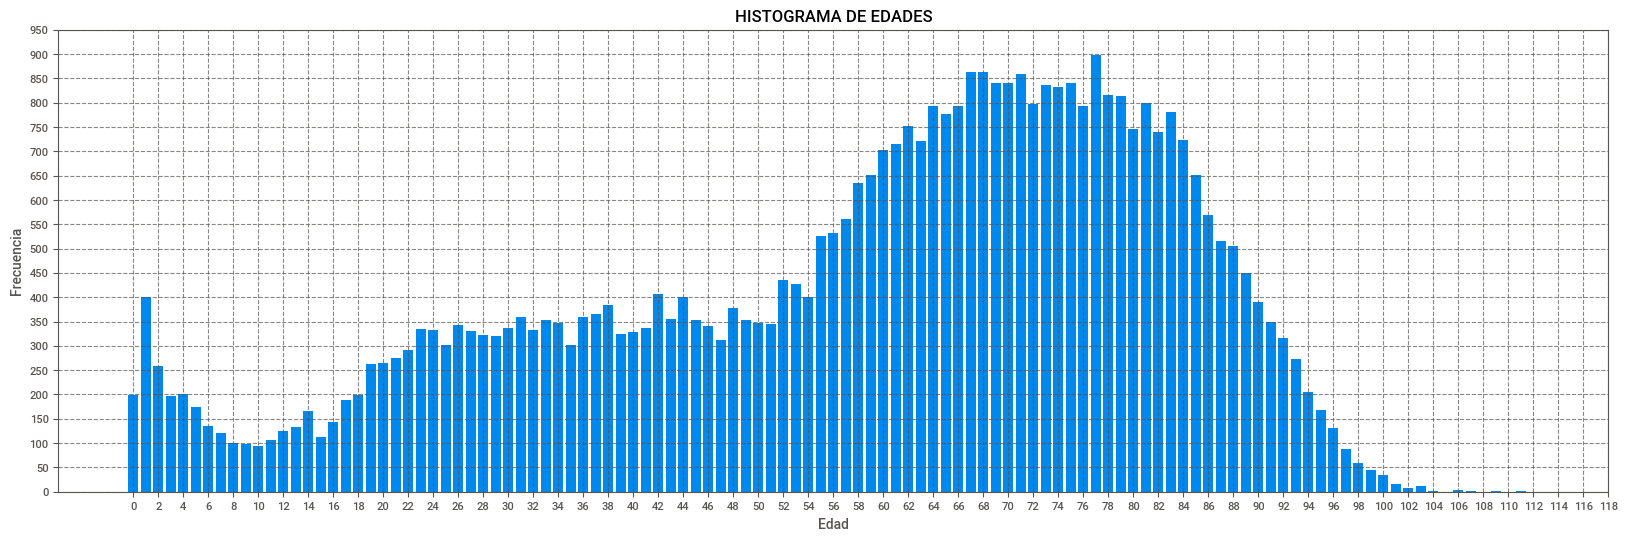

In [ ]:
#Realizando el histograma de frecuencia de edades para observar la tendencia de estas:
edad_egr = df['EdadEgreso'].value_counts()
Edades_tot = edad_egr.index
frecuencia_ed = edad_egr.values
plt.figure(figsize=(20, 6))
plt.bar(Edades_tot, frecuencia_ed)
plt.title('HISTOGRAMA DE EDADES')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.xticks(range(0, 120, 2))
plt.yticks(range(0, 1000, 50))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

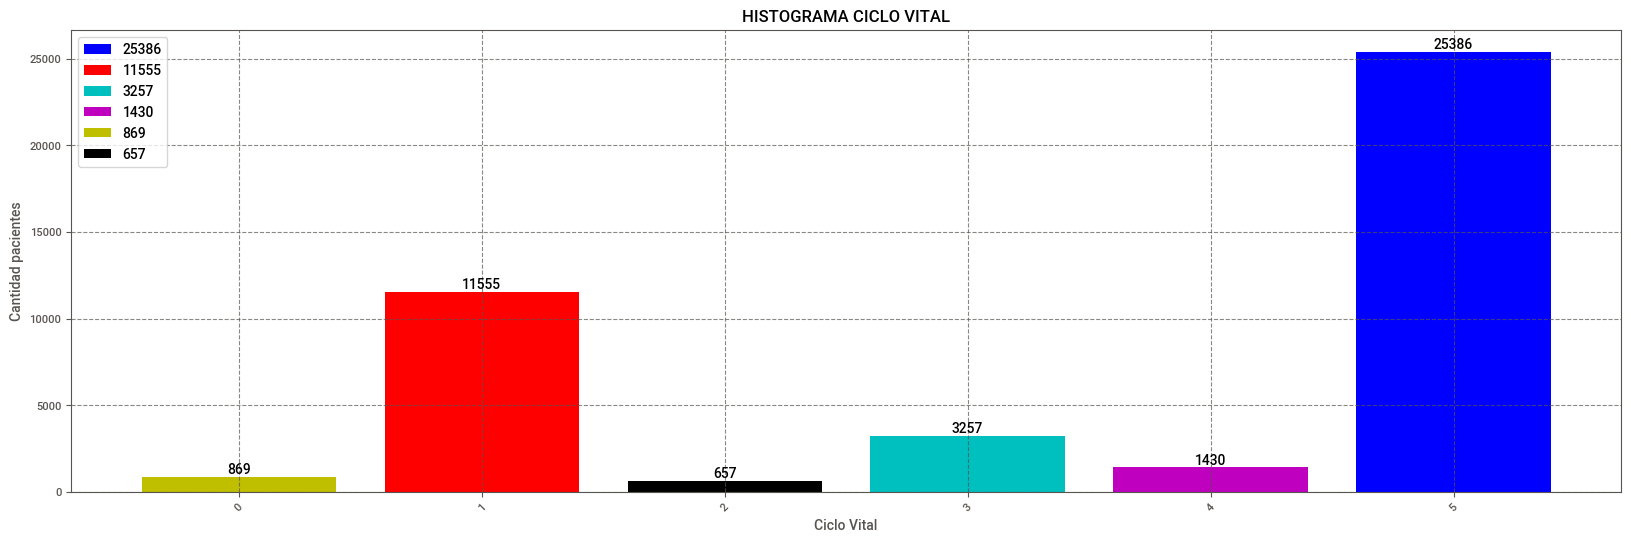

In [ ]:
CV_counts = df1['Ciclo_Vital'].value_counts()
categoria = CV_counts.index
frecuencia = CV_counts.values

# Colores para cada barra
colores = ['b', 'r', 'c', 'm', 'y', 'k']

# Configuración del tamaño de la figura
plt.figure(figsize=(20, 6))

# Iterar a través de las categorías y graficar cada una con un color diferente
for i, cat in enumerate(categoria):
    plt.bar(cat, frecuencia[i], color=colores[i], label=frecuencia[i])
    plt.text(cat, frecuencia[i], str(frecuencia[i]), ha='center', va='bottom')

plt.title('HISTOGRAMA CICLO VITAL')
plt.xlabel('Ciclo Vital')
plt.ylabel('Cantidad pacientes')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [9]:
# scaler = StandardScaler()

# df_fin['EdadEgreso'] = scaler.fit_transform(df['EdadEgreso'].values.reshape(-1, 1))

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()

# Ajusta y transforma la columna 'EdadEgreso' para que esté en el rango [0, 1]
df['EdadEgreso'] = scaler.fit_transform(df['EdadEgreso'].values.reshape(-1, 1))

In [10]:
#Cuántas categorías tienen las variables categóricas:
column_categ = df1.select_dtypes(include=['object'])

for columna in column_categ.columns:
    cardinalidad = len(df1[columna].unique())
    print(f"Variable '{columna}' tiene {cardinalidad} categorías únicas.")

Variable 'Tipo_Internacion' tiene 8 categorías únicas.
Variable 'DX_PRINCIPAL' tiene 2850 categorías únicas.


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43154 entries, 0 to 43153
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EdadEgreso            43154 non-null  float64
 1   Tipo_Afiliacion       43154 non-null  int64  
 2   Hospitalizacion       43154 non-null  int64  
 3   Tipo_Internacion      42945 non-null  object 
 4   Ciclo_Vital           43154 non-null  int64  
 5   ESPECIALIDAD_GRD      43154 non-null  int64  
 6   DX_PRINCIPAL          43154 non-null  object 
 7   HorasdeAlta           43154 non-null  int64  
 8   DiasEstanciaServicio  43154 non-null  int64  
 9   DiasEstanciaClinica   43154 non-null  int64  
 10  MODALIDAD             43154 non-null  int64  
 11  Transfusiones         43154 non-null  int64  
 12  Antioboticos          43154 non-null  int64  
 13  UCI_UCE               43154 non-null  int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 4.6+ MB


In [11]:
# Aplicar one-hot encoding a la columna 'Ciclo_Vital'
df2 = pd.get_dummies(df1, columns=['DX_PRINCIPAL'], prefix=['DX_PRINCIPAL'])
df_fin_encoded = pd.get_dummies(df2, columns=['Tipo_Internacion'], prefix=['Tipo_Internacion'])

# El nuevo DataFrame df_encoded contiene las columnas binarias
df_fin_encoded.head(10)

,EdadEgreso,Tipo_Afiliacion,Hospitalizacion,Ciclo_Vital,ESPECIALIDAD_GRD,HorasdeAlta,DiasEstanciaServicio,DiasEstanciaClinica,MODALIDAD,Transfusiones,...,DX_PRINCIPAL_Z940,DX_PRINCIPAL_Z944,DX_PRINCIPAL_Z948,Tipo_Internacion_Cuidado Intensivo Adultos,Tipo_Internacion_Cuidado Intermedio Adultos,Tipo_Internacion_General adultos,Tipo_Internacion_General pediátrica,Tipo_Internacion_Sin Informacion,Tipo_Internacion_Urgencias < 24 horas,Tipo_Internacion_Urgencias >= 24 horas
0,62,2,3,5,30,48,1,1,2,0,...,0,0,0,0,0,1,0,0,0,0
1,89,2,7,5,23,24,4,4,4,0,...,0,0,0,0,0,0,0,0,0,1
2,90,2,3,5,23,48,1,2,4,0,...,0,0,0,0,0,1,0,0,0,0
3,88,2,3,5,23,48,1,3,4,0,...,0,0,0,0,0,1,0,0,0,0
4,89,3,3,5,36,24,4,5,4,0,...,0,0,0,0,0,1,0,0,0,0
5,74,2,3,5,41,96,10,10,2,0,...,0,0,0,0,0,1,0,0,0,0
6,87,2,3,5,41,0,2,2,4,0,...,0,0,0,0,0,1,0,0,0,0
7,87,2,3,5,23,48,5,6,4,0,...,0,0,0,0,0,1,0,0,0,0
8,87,2,3,5,41,48,8,9,4,0,...,0,0,0,0,0,1,0,0,0,0
9,87,2,3,5,41,72,4,6,4,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
print(df_fin_encoded.shape)

(43154, 2869)


In [12]:
df1=df.drop(['DX_PRINCIPAL','Tipo_Internacion'],axis=1)

In [ ]:
print(df_fin_encoded.shape)

(43154, 2869)


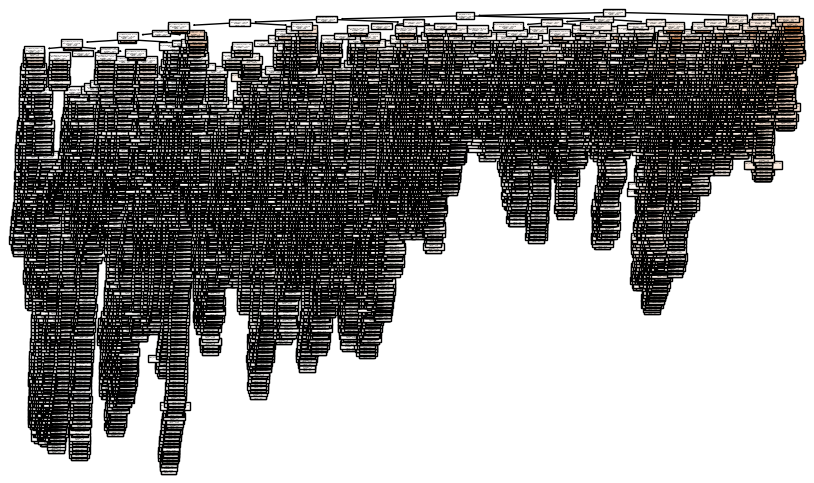

Error Cuadrático Medio: 77.53201959345512
Mean Absolute Error (MAE): 3.2090333294712856


In [34]:
#Arbol de decision
import pandas as pd
from sklearn.model_selection import train_test_split

#sample_df = df_fin_encoded.sample(n=5000, random_state=42)
X = df_fin_encoded.drop('DiasEstanciaClinica', axis=1)
y = df_fin_encoded['DiasEstanciaClinica']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Entrenamiento del modelo
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Paso 4: Evaluación del modelo
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)  # Cambiamos de mean_squared_error a mean_absolute_error

# Paso 5: Visualización del árbol de decisión (opcional)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Puedes visualizar el árbol de decisión
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

print(f"Error Cuadrático Medio: {mse}")

print(f"Mean Absolute Error (MAE): {mae}")


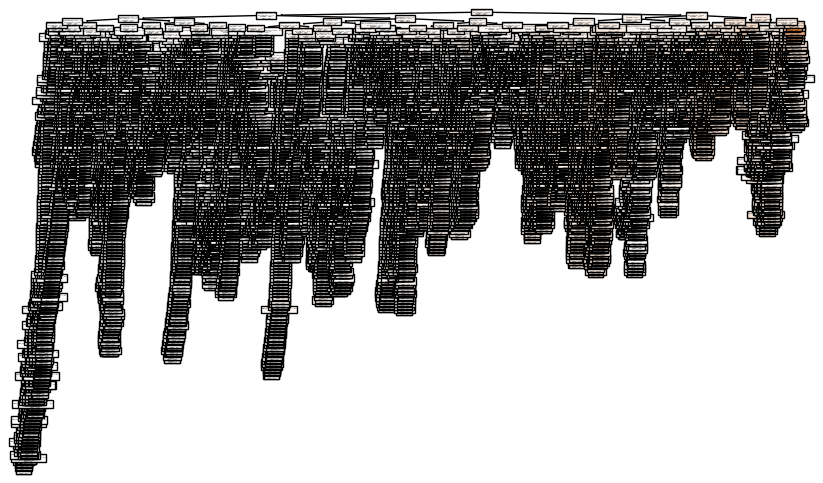

Error Cuadrático Medio: 28.399808828640946
Mean Absolute Error (MAE): 2.205711968485691


In [35]:
#Arbol de decision
import pandas as pd
from sklearn.model_selection import train_test_split

#sample_df = df_fin_encoded.sample(n=5000, random_state=42)
X = df_fin_encoded.drop('DiasEstanciaServicio', axis=1)
y = df_fin_encoded['DiasEstanciaServicio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Entrenamiento del modelo
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Paso 4: Evaluación del modelo
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)  # Cambiamos de mean_squared_error a mean_absolute_error

# Paso 5: Visualización del árbol de decisión (opcional)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Puedes visualizar el árbol de decisión
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

print(f"Error Cuadrático Medio: {mse}")

print(f"Mean Absolute Error (MAE): {mae}")


In [30]:
#Random Forest
# División de datos
from sklearn.model_selection import train_test_split

X = df_fin_encoded.drop('DiasEstanciaClinica', axis=1)
y = df_fin_encoded['DiasEstanciaClinica']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Importación de bibliotecas
from sklearn.ensemble import RandomForestRegressor

# Paso 4: Entrenamiento del modelo
model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)

# Paso 5: Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas
print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

from sklearn.metrics import mean_absolute_error

# Paso 7: Evaluación del modelo random forest regressor
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)



Error Cuadrático Medio: 56.572474062210226
Coeficiente de Determinación (R^2): 0.5642520704092626
Mean Absolute Error (MAE): 2.747564384932129


In [31]:
#Random Forest
# División de datos
from sklearn.model_selection import train_test_split

X = df_fin_encoded.drop('DiasEstanciaServicio', axis=1)
y = df_fin_encoded['DiasEstanciaServicio']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Importación de bibliotecas
from sklearn.ensemble import RandomForestRegressor

# Paso 4: Entrenamiento del modelo
model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)

# Paso 5: Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas
print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

from sklearn.metrics import mean_absolute_error

# Evaluación del modelo random forest regressor
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)


Error Cuadrático Medio: 16.457387860388785
Coeficiente de Determinación (R^2): 0.6284483985817577
Mean Absolute Error (MAE): 2.747564384932129


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_fin_encoded.drop('DiasEstanciaServicio', axis=1)
y = df_fin_encoded['DiasEstanciaServicio']


# Paso 2: División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Creación y entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Paso 4: Evaluación del modelo
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Imprimir métricas
print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

from sklearn.metrics import mean_absolute_error

# Evaluación del modelo random forest regressor
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

Error Cuadrático Medio: 22.4502364330495
Coeficiente de Determinación (R^2): 0.4931503486653164
Mean Absolute Error (MAE): 1.8653939599580893


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_fin_encoded.drop('DiasEstanciaClinica', axis=1)
y = df_fin_encoded['DiasEstanciaClinica']


# Paso 2: División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Creación y entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Paso 4: Evaluación del modelo
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Imprimir métricas
print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

from sklearn.metrics import mean_absolute_error

# Evaluación del modelo random forest regressor
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

Error Cuadrático Medio: 2.761431616846068e+18
Coeficiente de Determinación (R^2): -2.1269851278271376e+16
Mean Absolute Error (MAE): 2.6900858113605524


In [25]:
# Normalizar las características (opcional pero a menudo recomendado)

from tensorflow import keras
from tensorflow.keras import layers
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential()

# Agregar capas ocultas
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))

# Capa de salida (una neurona para la regresión)
model.add(layers.Dense(1, activation='linear'))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)


Epoch 1/100
1079/1079 [==============================] - 8s 6ms/step - loss: 28.9694 - mae: 3.3235 - val_loss: 25.9203 - val_mae: 3.0972
Epoch 2/100
1079/1079 [==============================] - 8s 8ms/step - loss: 20.6790 - mae: 2.7539 - val_loss: 23.6453 - val_mae: 2.8342
Epoch 3/100
1079/1079 [==============================] - 7s 6ms/step - loss: 17.8060 - mae: 2.4869 - val_loss: 22.1173 - val_mae: 2.6583
Epoch 4/100
1079/1079 [==============================] - 8s 8ms/step - loss: 16.1206 - mae: 2.3204 - val_loss: 22.2150 - val_mae: 2.6293
Epoch 5/100
1079/1079 [==============================] - 6s 6ms/step - loss: 14.9414 - mae: 2.2220 - val_loss: 21.9050 - val_mae: 2.5667
Epoch 6/100
1079/1079 [==============================] - 8s 7ms/step - loss: 14.1213 - mae: 2.1557 - val_loss: 21.0625 - val_mae: 2.5501
Epoch 7/100
1079/1079 [==============================] - 7s 6ms/step - loss: 13.4955 - mae: 2.1067 - val_loss: 20.6584 - val_mae: 2.4506
Epoch 8/100
1079/1079 [==================

In [26]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Error Cuadrático Medio: {loss}')
print(f'Error absoluto medio: {mae}')


270/270 [==============================] - 1s 5ms/step - loss: 25.7859 - mae: 2.4953
Error Cuadrático Medio: 25.78586769104004
Error absoluto medio: 2.495349407196045
